# Edge Addition Algorithm - simple implementation example

<font size="3">Run time is around ~5 minutes with the default input. \
\
In this example we will use the E.A.A. model to build a low-connectivity DCA model. \
The information that we have about the training RNA family consists in: the sequence alignment and the consenus secondary structure (both trough the Covariance Model) and the 3D contacts trough the PDB file. </font> 


In [2]:
display(HTML("<style>.container { width:90% !important; }</style>"))
using FCSeqTools
include("plotting_tools.jl")

HTML{String}("<style>.container { width:90% !important; }</style>")

plot_stat_check (generic function with 1 method)

In [3]:
ss_contact_list, ss_contact_matrix, molecule,dot_bracket,len=secondary_structure_plot_tools("RF00379.cm")
tertiary_contact_list,tertiary_contact_matrix=tertiary_plot_tools(len,"mapp_4qln_A.pdb_A_RF00379.txt.csv",8);
natural_sequences=do_number_matrix_rna(do_letter_matrix("RF00379.txt"),0.2);
println("The RF00379 family is $len nucletodide long and has $(sum(vec(ss_contact_matrix))) secondary structure contacts. It contains $(length(natural_sequences[:,1])) sequences.")
println("\n", join(do_letter_matrix("RF00379.txt")[1,:]))
println("\n", ss_matrix_to_dot_bracket(ss_contact_matrix))

The RF00379 family is 136 nucletodide long and has 20 secondary structure contacts. It contains 3808 sequences.

-AAUAACAUAAGCCUAAGUU--UA-AAACGCGGGGGAACCA---UUAAUUGGGGUGAAUCACAUUUAUU-UUGUGUAGGUU-AGCCUU---UACCGAACCCGUCAGCUAACCCCGUUGGUA-AAAGGAGUGAAUAA

..........((((...(((......)))..........((........))(((.....((((........))))..((((..........))))...)))................))))...............


<font size="3">Here is an example of  RF00379 molecule and its associated consensus secondary structure. \
To make the execution faster we will not generate full lenght molecules but just a portion from nucleotide 55 to 102. </font>

In [4]:
first=55
last=102

tertiary_contact_list,tertiary_contact_matrix=tertiary_plot_tools(len,"mapp_4qln_A.pdb_A_RF00379.txt.csv",8);
natural_sequences=do_number_matrix_rna(do_letter_matrix("RF00379.txt"),0.2)
ss_contact_list, ss_contact_matrix=secondary_structure_plot_tools("RF00379.cm")
natural_sequences=do_number_matrix_rna(do_letter_matrix("RF00379.txt"),0.2)
natural_sequences=do_number_matrix_rna(do_letter_matrix("RF00379.txt")[:,first:last],0.2)
ss_contact_matrix=ss_contact_matrix[first:last,first:last]
tertiary_contact_matrix=tertiary_contact_matrix[first:last,first:last]
len=last-first+1;
println("The segment is $len nucletodide long and has $(sum(vec(ss_contact_matrix))) secondary structure contacts. The database contains $(length(natural_sequences[:,1])) sequences.")
println("\n", uppercase(join(collect(molecule)[first:last])))
println("\n", ss_matrix_to_dot_bracket(ss_contact_matrix))

The segment is 48 nucletodide long and has 8 secondary structure contacts. The database contains 3831 sequences.

-----CCGGUUAUAUUAGGGG--GGGCAACCCUUUUGGCCC---CCC-

.....((((........))))..((((..........)))).......


<font size="3">Here is a segment example with its associated secondary structure. \
The database has a different size because the data-cleaning procedure depends on the region selected. \
Now we will run the E.A.A. building up our ineraction netwotk edge by edge till we reach a good performance generative model. \
At each iteration the algorithm reports: the added edge, the iteration number, the number of total added edges and the connectivity percentace of the fully connected case.\
Each 15 iterations the algorithm reports: the model score (Pearson between natural and artificial two-point correlations), the model mean energy, the model partition function and the model entropy. 

In [5]:
s=time()
Random.seed!(2)
score,likelihood_gain,generated_sequences,Jij,h,contact_list,site_degree,edge_list=E_A_A(5,0.05,7000,natural_sequences,"example_output.txt");
s=time()-s

Fully connected model has 1128 edges and a score around ~ 0.95

[7  20]  iter: 1   edges: 1   complex: 0.09%
[8  19]  iter: 2   edges: 2   complex: 0.18%
[9  18]  iter: 3   edges: 3   complex: 0.27%
[27  38]  iter: 4   edges: 4   complex: 0.35%
[6  21]  iter: 5   edges: 5   complex: 0.44%
[5  22]  iter: 6   edges: 6   complex: 0.53%
[1  44]  iter: 7   edges: 7   complex: 0.62%
[10  17]  iter: 8   edges: 8   complex: 0.71%
[10  11]  iter: 9   edges: 9   complex: 0.8%
[22  23]  iter: 10   edges: 10   complex: 0.89%
[13  14]  iter: 11   edges: 11   complex: 0.98%
[25  40]  iter: 12   edges: 12   complex: 1.06%
[26  39]  iter: 13   edges: 13   complex: 1.15%
[14  15]  iter: 14   edges: 14   complex: 1.24%
[22  42]  iter: 15   edges: 15   complex: 1.33%   Score = 0.685    <E> = 42.32    log(Z) = 0.07   S = 42.39
[12  13]  iter: 16   edges: 16   complex: 1.42%
[36  37]  iter: 17   edges: 17   complex: 1.51%
[15  16]  iter: 18   edges: 18   complex: 1.6%
[16  17]  iter: 19   edges: 19   compl

[12  18]  iter: 156   edges: 155   complex: 13.74%
[36  42]  iter: 157   edges: 156   complex: 13.83%
[17  34]  iter: 158   edges: 157   complex: 13.92%
[15  16]  iter: 159   edges: 157   complex: 13.92%
[31  42]  iter: 160   edges: 158   complex: 14.01%
[6  20]  iter: 161   edges: 159   complex: 14.1%
[11  30]  iter: 162   edges: 160   complex: 14.18%
[17  38]  iter: 163   edges: 161   complex: 14.27%
[13  20]  iter: 164   edges: 162   complex: 14.36%
[26  35]  iter: 165   edges: 163   complex: 14.45%   Score = 0.93    <E> = 34.66    log(Z) = 1.21   S = 35.87
[27  32]  iter: 166   edges: 164   complex: 14.54%
[30  33]  iter: 167   edges: 165   complex: 14.63%
[10  32]  iter: 168   edges: 166   complex: 14.72%
[18  19]  iter: 169   edges: 166   complex: 14.72%
[13  15]  iter: 170   edges: 167   complex: 14.8%
[28  39]  iter: 171   edges: 168   complex: 14.89%
[22  34]  iter: 172   edges: 169   complex: 14.98%
[15  17]  iter: 173   edges: 170   complex: 15.07%
[7  48]  iter: 174   edges

233.11652088165283

<font size="3">The model obtained has a performance comparable to the fully connected DCA while having just ~20% of its connectivity. The entropy of the model is 35.08. This means that it is able to generate e³⁵ (3.5x10¹⁵) different 55-102 segments for the RF00379 family. \
Now we can test our artificial sequences. We do the classical statistical check of the PCA projection and the two-point correlation representation. \
We test the performance of our model against the one of the Covariance Model. The CM model only contains trivial one-point and secondary information so our model must do better than it. </font>

In [6]:
cm_sequences=rna_cm_model_generation(0.8,0.05,7000,natural_sequences,ss_contact_matrix);

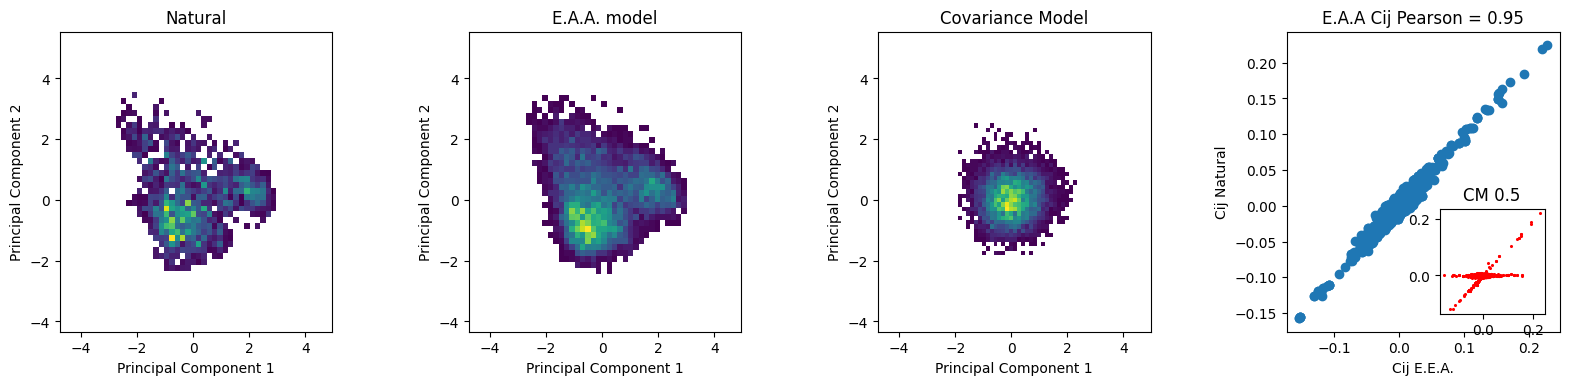

In [7]:
plot_stat_check(natural_sequences, generated_sequences, cm_sequences)

<font size="3">The E.A.A. artificial molecules are practically statistically indistinguishable from the natural ones. We see that they have a very similar PCA projection (artificial one seems richer just because we have more artificial sequences than natural ones) while Covariance Model fails to capture the details of the distribution. 
    The selected model has almost a perfect two-point statistics for all site pairs while the CM model only captures it for the ones involved in secondary structure contacts. \
     </font>


<font size="3">The interpretability is one of the main reasons in our quest to find parsimonious generative models. Now that we are sure we obtained a good generative model with relatively few parameters we can try to interprete them. \
Dividing the added edges in secondary structure contacts, 3D contacts we have:

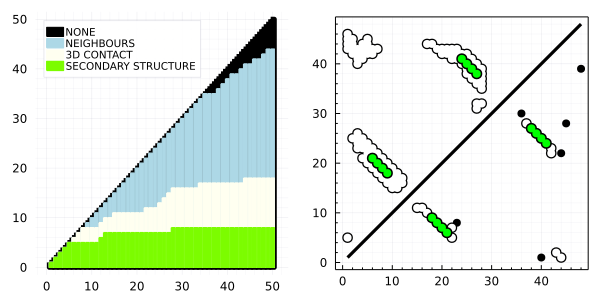

In [8]:
edge_interpretation_plot(len,ss_contact_matrix,tertiary_contact_matrix,edge_list[1:50,:])

<font size="3">We see that the secondary structure contacts are taken in the first few iteration. We have lot of neighbouring sites probably due to philogenic effects. It is striking that we see some 3D contacts (in particular around site 40) before the NONE edges. This
suggests that our algorithm effectively captures some information about the tertiary structure. \
Those results, that are far more general than this simple example, suggest that the added edges have a co-evolutionary interpretation.

<font size="3">
This notebook serves as an example of the application of the techniques described in the main text.
